<a href="https://colab.research.google.com/github/megajoules8/data_science_worksheets/blob/main/condo_market_study_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Condo Market in Singapore

## Learning Objectives:
- Become familiar with different visualization techniques  
- Understand the confounding effect and the way to control for it
- Explore possible relationships among multiple variables

<i><b>Background</b></i>: Buying a condo might be a dream for some Singaporeans. Depending on the location and area of the property, the corresponding price differs substantially. For those who want to buy condos for residing or for investments, a deeper understanding of Singapore’s real estate market is crucial. The file `condo.csv` contains the prices of condos in Singapore for the past several years. Moreover, some attributes of such condos are also included in the file.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv("condo.csv")
df.head(10)

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19
5,MOUNT FABER LODGE,4400000,1188,4,RCR,Resale,3703,06 to 10,999.0,Oct-19
6,BLUE HORIZON,990000,1022,5,OCR,Resale,969,21 to 25,80.0,Oct-19
7,DOVER PARKVIEW,1088000,1162,5,RCR,Resale,936,06 to 10,73.0,Oct-19
8,CARIBBEAN AT KEPPEL BAY,1470000,1751,4,RCR,Resale,840,06 to 10,79.0,Oct-19
9,THE INTERLACE,4550000,868,4,RCR,Resale,5242,16 to 20,89.0,Oct-19


## Task 1: Explore the relationship between the condo price and the condo type

For a Singaporean who wants to invest in the real estate market, would you suggest him or her to buy resale condos or newly built condos? Please analyze the historical data in the file `condo.csv` to arrive at your conclusion. Specifically, you need to explore the relationship between the condo price and the type of the condo (resale versus new). <b>Note</b>: if you want to draw histograms to explore the distribution of the condo price, please set bins as `np.arange(0.5e6, 5e6, 0.1e6)`.

In [ ]:
df.type.unique()

array(['Resale', 'New Sale'], dtype=object)

In [ ]:
df.price.describe() #get summary statistics for entire dataframe

count    3.216800e+04
mean     1.640373e+06
std      1.432406e+06
min      4.880000e+05
25%      9.800000e+05
50%      1.300000e+06
75%      1.774850e+06
max      5.200000e+07
Name: price, dtype: float64

In [ ]:
resale = df.loc[(df.type == 'Resale')].copy()
resale.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19


In [ ]:
resale.price.describe()

count    2.052300e+04
mean     1.823054e+06
std      1.692404e+06
min      4.880000e+05
25%      1.028570e+06
50%      1.375000e+06
75%      1.950000e+06
max      5.200000e+07
Name: price, dtype: float64

In [ ]:
newsale = df.loc[(df.type == 'New Sale')].copy()
newsale.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
44,QUEENS PEAK,2585000,1715,3,RCR,New Sale,1507,36 to 40,95.0,Oct-19
84,QUEENS PEAK,3304000,1650,3,RCR,New Sale,2002,36 to 40,95.0,Sep-19
94,QUEENS PEAK,2570000,1705,3,RCR,New Sale,1507,36 to 40,95.0,Sep-19
111,QUEENS PEAK,2500000,1659,3,RCR,New Sale,1507,26 to 30,95.0,Sep-19
151,QUEENS PEAK,1839000,1837,3,RCR,New Sale,1001,36 to 40,95.0,Aug-19


In [ ]:
newsale.price.describe()


count    1.164500e+04
mean     1.318420e+06
std      6.764492e+05
min      5.460000e+05
25%      9.000000e+05
50%      1.202000e+06
75%      1.526000e+06
max      1.888320e+07
Name: price, dtype: float64

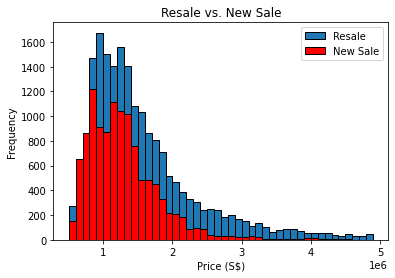

In [ ]:
setbins = np.arange(0.5e6, 5e6, 0.1e6)
plt.hist(resale['price'], bins = setbins, edgecolor = 'black', label= 'Resale')
plt.hist(newsale['price'], bins = setbins, edgecolor = 'black', color='red', label= 'New Sale')

plt.xlabel('Price (S$)')
plt.ylabel("Frequency")
plt.title('Resale vs. New Sale')
plt.legend()
plt.show()

This is a counter-intuitive finding that resale condos are more expensive than the new condos on average. Can you think about a possible reason for this?

In [ ]:
#newsale is cheaper. There might be another variable impacting the price, such as location or size of the appartment.

Newsale is cheaper. There might be another variable impacting the price, such as location or size of the appartment.

## Task 2: Explore the relationship between the condo area and the condo type


Now let’s focus on another attribute of a condo in the data set, the area of a condo. Please explore the distribution of the area of a condo by the condo type. Please draw a visualization to present your findings? If you want to draw histograms to explore the distribution of the area of a condo, please set the bins as `np.arange(0.5e3, 10e3, 0.1e3)`.

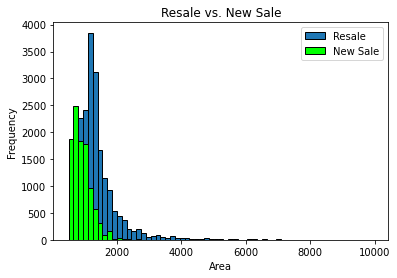

In [ ]:
setbins2 = np.arange(0.5e3, 10e3, 0.15e3)
plt.hist(resale.area, bins = setbins2, edgecolor = 'black', label = 'Resale')
plt.hist(newsale.area, bins = setbins2, edgecolor = 'black', color='lime', label = 'New Sale')

plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Resale vs. New Sale')
plt.legend()
plt.show()

In [ ]:
resale.area.describe()

count    20523.000000
mean      1345.806607
std        678.821591
min        355.000000
25%        969.000000
50%       1227.000000
75%       1507.000000
max      11098.000000
Name: area, dtype: float64

In [ ]:
newsale.area.describe()

count    11645.000000
mean       862.379219
std        336.641076
min        409.000000
25%        624.000000
50%        807.000000
75%       1033.000000
max       7868.000000
Name: area, dtype: float64

In [ ]:
#both histograms are skewed left, we see that the variance in resale condo area is higher, the overall spread goes both to lower and higer area codes than new condos.
#We see that the size of the condo has a large impact on the price of the condo. New sale condos seem to usually be smaller in area.

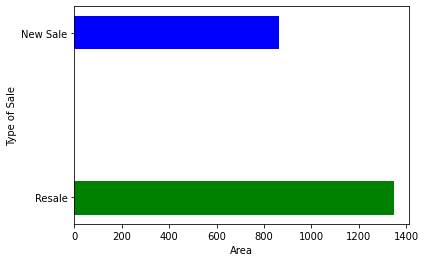

In [ ]:
#looking at mean area
mean_bar =plt.barh(['Resale', 'New Sale'], [resale.area.mean(), newsale.area.mean()], height = 0.2, color = 'b')
mean_bar[0].set_color('green')
plt.ylabel('Type of Sale')
plt.xlabel('Area')
plt.show()

In [ ]:
# #just looking at district code out of interest
# setbins3 = np.arange(15, 20, 30)
# plt.hist(resale.district_code, bins = setbins3, edgecolor = 'black', label = 'Resale')
# plt.hist(newsale.district_code, bins = setbins3, edgecolor = 'black', color='lime', label = 'New Sale')

# plt.xlabel('District Code')
# plt.ylabel('Frequency')
# plt.title('Resale vs. New Sale')
# plt.legend()
# plt.show()

## Task 3: Explore the relationship between the condo area and the condo price


Moreover, please explore the relationship between the area of a condo and its price. You can draw a scatter plot to uncover the possible pattern between the two variables.

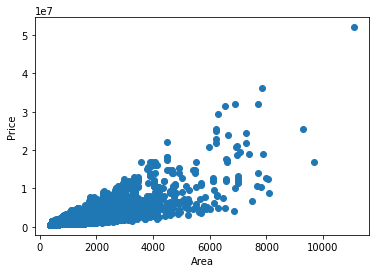

In [ ]:
plt.scatter(df.area, df.price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
# #m, b = np.polyfit(df.area, df.price, 1)
# #plt.plot(df.area, m*df.price + b)
# #https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas

# sns.lmplot(x='area',y='price',data=df,fit_reg=True)
# plt.show()
# #how do we show the regression line, r squared val?

In [ ]:
#there is a strong linear correlation between area and price which prevents us from knowing if resale houses are more expensive because resale homes have a higher value
#or if because they are more likely to be in a more expensive area

From Tasks 1-3, now you should know the relationship found between the condo price and the condo type is not trustworthy. There is a third variable that is related to both the condo price and the condo type. In the above analysis, this third variable is the area of the condo. We call this third variable as the <i>confounder</i> or <i>confounding variable</i>.

## Task 4: Grouping

Now let’s explore the ways of controlling for the confounding effect of the area of a condo in the analysis. A useful method is to do a stratified analysis. Since the confounder variable, the area of a condo, is continuous, to simplify the discussion, a discretization is carried out. Please form a new variable in the data set by grouping the condos into 3 different categories in terms of their areas. The three categories are defined as follows:
1.	Small: the area of a condo less than 800 square feet
2.	Median: the area of a condo between 800 and 1200 square feet
3.	Large: the area of a condo larger than 1200 square feet

In [ ]:
# area_small = df[df.area < 800] # equal df area less than 800
# area_median = df[(df.area > 800) & (df.area < 1200)] #equal df area greater than 800 and less than 1200
# area_large = df[df.area > 1200] #equal df area greater than 1200
# #area_small.head()

#This is the answer but lets visualise something

area_small = df["area"] < 800
area_median = (df["area"] >= 800) & (df["area"] <= 1200)
area_large = df["area"] > 1200


,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19


In [ ]:
# newsale_gp_small = area_small.loc[(area_small.type == 'New Sale')].copy()
# newsale_gp_median = area_median.loc[(area_median.type == 'New Sale')].copy()
# newsale_gp_large = area_large.loc[(area_large.type == 'New Sale')].copy()
# resale_gp_median = area_median.loc[(area_median.type == 'Resale')].copy()
# resale_gp_small = area_small.loc[(area_small.type == 'Resale')].copy()
# resale_gp_large = area_large.loc[(area_large.type == 'Resale')].copy()
# #newsale_gp.head()

In [ ]:
# barlist = plt.bar(['Resale', 'New Sale'], [resale_gp_small.area.mean(), newsale_gp_small.area.mean()], width = 0.2, color = 'b')
# barlist[0].set_color('green') #this is not required, shown for example

# plt.ylabel('Type of Sale')
# plt.xlabel('Area')
# plt.show()

In [ ]:
# barlist = plt.bar(['Resale', 'New Sale'], [resale_gp_small.price.mean(), newsale_gp_small.price.mean()], width = 0.2, color = 'b')
# barlist[0].set_color('green') #this is not required, shown for example

# plt.ylabel('Price')
# plt.xlabel('Type of Sale')
# plt.show()

In [ ]:
# groupings_by_area = np.arange(0.5e3, 10e3, 0.15e3)
# plt.hist(area_small.area, bins = groupings_by_area, edgecolor = 'black', label = 'Resale')
# plt.hist(area_median.area, bins = groupings_by_area, edgecolor = 'black', color='lime', label = 'New Sale')
# plt.hist(area_large.area, bins = groupings_by_area, edgecolor = 'black', color='lime', label = 'New Sale')
# plt.xlabel('Area')
# plt.ylabel('Frequency')
# plt.title('Resale vs. New Sale')
# plt.legend()
# plt.show()

In [ ]:
df['area_gp'] = 1*area_small + 2*area_median + 3*area_large #makes new coloumn with discreate area groups from 1-3
df.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date,area_gp
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19,3
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19,1
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19,3
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19,2
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19,3


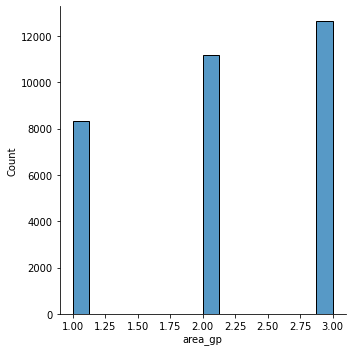

In [ ]:
area_group = df["area_gp"]
sns.displot(area_group)

plt.show()

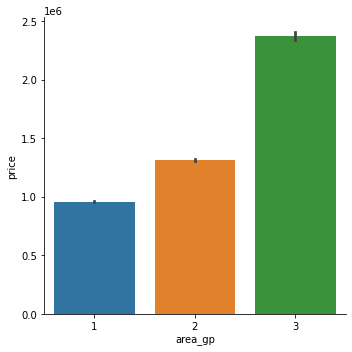

In [ ]:
sns.catplot(x="area_gp", y="price", kind="bar", data=df);

In [ ]:
#df area_group equal df area_gp map 1 is small, 2 is median, and 3 is large
#area_group = area_gp.map({'area_small': 1 , 'area_median': 2, 'area_large':3})
# using this to do the grouping
#df["area_gp"] = 1 * area_small + 2 * area_median + 3 * area_large
#df['area_gp'].unique()


In [ ]:
#df.head()

In [ ]:
#df["area_gp"].value_counts(normalize = True)

In [ ]:
# #looking at mean area
# mean_bar =plt.barh(['Resale', 'New Sale'], [resale.area.mean(), newsale.area.mean()], height = 0.2, color = 'b')
# mean_bar[0].set_color('green')
# plt.ylabel('Type of Sale')
# plt.xlabel('Area')
# plt.show()

In [ ]:
#newsale_gp = area_gp.loc[(area_gp.type == 'New Sale')].copy()
#newsale_gp.head()
#grouped_condos = df.groupby(['type','area_gp'])['area_gp'].count()
#grouped_condos.unstack()#.plot.hist()

In [ ]:
# #groupbar = [[30, 25, 50, 20],
# [40, 23, 51, 17],
# [35, 22, 45, 19]]
# X = np.arange(4)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
# ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
# plt.legend()
# plt.show()

In [ ]:
# barlist = plt.bar(['Resale', 'New Sale'], [df_resale.area.mean(), df_new.area.mean()], width = 0.2, color = 'b')
# barlist[0].set_color('green') #this is not required, shown for example

# plt.ylabel('Type of Sale')
# plt.xlabel('Area')
# plt.show()

In [ ]:
# age = new_df["age"]
# sns.displot(age)

# plt.show()

In [ ]:
# plt.close()
# sns.barplot(
#     data=new_df,
#     x= "location",
#     y= "age"
# )
# plt.show()

## Task 5: The relationship between the condo price and the condo type, controlling for the condo area


With the new categorical variable and the condo type, 6 possible combinations of the two variables can be generated to represent a condo’s profile. For example, we can define a condo's profile as small and resale. Now please explore the relationship between the condo price and condo type by 3 different categories of the condo area. What is your conclusion?

In [ ]:
# Hint: a side by side box plot for each area category, similar to what you did in the previous question

By controlling for apartment area by grouping, we can see that the size of the appartment also influences the price. Then, we can look at the relationship between new sale and resale price. We see that for the small and medium group, New sale appartments are more expensive, but for large appartments, the price for resale appartments is higher than for new sale.

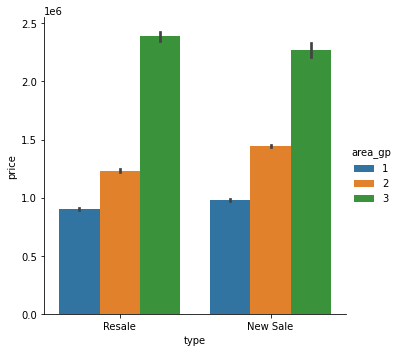

In [ ]:
sns.catplot(x="type", y="price", hue="area_gp", kind="bar", data=df);
#condolist =["type", "price", "area_gp"]

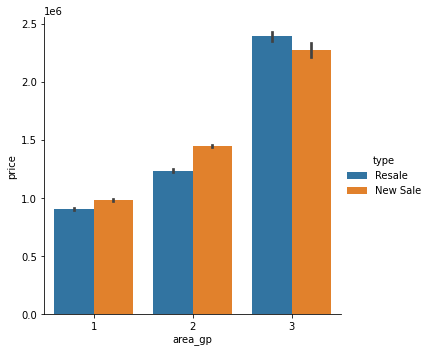

In [ ]:
sns.catplot(x="area_gp", y="price", hue="type", kind="bar", data=df);

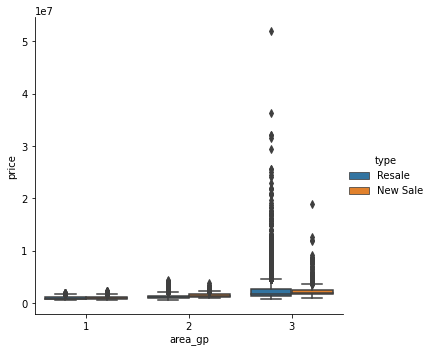

In [ ]:
g = sns.catplot(x="area_gp", y="price", hue="type", kind="box", data=df);
#sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
#g.set(yscale="");

In [ ]:
# sns.violinplot(x="area_gp", y="age", data=new_df)

# plt.show()

In [ ]:
areagp_mean_price = df.groupby(["area_gp","type"])["price"].mean()
areagp_mean_price

area_gp  type    
1        New Sale    9.827969e+05
         Resale      9.019582e+05
2        New Sale    1.445176e+06
         Resale      1.233604e+06
3        New Sale    2.269620e+06
         Resale      2.390063e+06
Name: price, dtype: float64

In [ ]:
# size_set equal small, median, large (in a list format)
# type_set equal Resale, New Sale (in a list format)

# filt_SR equal df area_group equal size_set indexed at 0 and df type equal type_set indexed at 0
# #do this same code for all 5 other combinations
# #Feel free after creating filters to make bar charts, histograms, boxplots, etc. comparing price for each combination

In [ ]:
# draw_list = ['Resale', 'New Sale']
# draw_data = [df_resale.price, df_new.price]

# plt.boxplot(x = draw_data)
# plt.yscale('log')
# plt.xticks([1,2], draw_list)

# plt.tight_layout() #not always necessary
# plt.show()

In [ ]:
# Other visualizations provide other information about the relationship between age and location.
# For example, a violin plot shows distributions of age like a histogram, but creates separate distributions for each category.

# plt.close()
# sns.violinplot(x="location", y="age", data=new_df)

# plt.show()

In [ ]:
# import codecademylib3_seaborn
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Import CSVs:
# user_data = pd.read_csv("user_data.csv")
# pop_data = pd.read_csv("pop_data.csv")

# # Merged tables with location data:
# new_df = pd.merge(user_data, pop_data)
# new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
# new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"



# # Paste histogram code:
# age = new_df["age"]
# sns.displot(age)

# plt.show()

# # Paste mean age location code:
# location_mean_age = new_df.groupby("location").age.mean()

# print(location_mean_age)

# # Paste barplot code:

# plt.close()
# sns.barplot(
#     data=new_df,
#     x= "location",
#     y= "age"
# )
# plt.show()
# # Paste violinplot code:
# plt.close()
# sns.violinplot(x="location", y="age", data=new_df)

# plt.show()